# Exploration

In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'datalab.sqlite')
db_path

'/Users/loicdogon/code/RonanB400/decp_ml/data/datalab.sqlite'

In [3]:
conn = sqlite3.connect(db_path)
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)

In [4]:
data


,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data
0,2154005160001320242024-LOT04,20242024-LOT04,Marché,21540051600013,COMMUNE DE BATILLY,215400516,78885470100018,SIRET,ACOMETAL,788854701,...,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,54980,Code postal,None,data.gouv.fr decp-2024.json
1,243500667002882021M226MO,2021M226MO,Marché,24350066700288,CC VAL D'ILLE-AUBIGNE,243500667,38373211200032,SIRET,UNIVERS,383732112,...,Prestations intellectuelles,1.0,Solidaire,NaN,NaN,NaN,35520,Code postal,None,data.gouv.fr decp-2024.json
2,249710047000472024SS_PRD_TRV,2024SS_PRD_TRV,Marché,24971004700047,COMMUNAUTE DE COMMUNES DE MARIE GALANTE,249710047,43387249600016,SIRET,COTRAM B.T.P.,433872496,...,Travaux,NaN,Solidaire,NaN,NaN,NaN,97112,Code postal,None,data.gouv.fr decp-2024.json
3,6254801990001124-0806-L2,24-0806-L2,Marché,62548019900011,"LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...",625480199,55204695502544,SIRET,ENGIE ENERGIE SERVICES,552046955,...,Pas de CCAG,0.0,Pas de groupement,NaN,NaN,NaN,39,Code département,None,data.gouv.fr decp-2024.json
4,20002563300013202424011BCR,202424011BCR,Marché,20002563300013,SI DE RESTAURATION COLLECTIVE,200025633,47698032100238,SIRET,POMONA EPISAVEURS,476980321,...,Fournitures courantes et services,0.0,Pas de groupement,0.0,0.0,0.0,45800,Code postal,None,data.gouv.fr decp-2025-04.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299665,243000643000452024240072,2024240072,Marché,24300064300045,COMMUNAUTE AGGLO NIMES METROPOLE,243000643,79386502300055,SIRET,SERVICES MAINTENANCE ENERGIES,793865023,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,30947,Code postal,None,data.gouv.fr decp-2024.json
299666,2133016250001720230231110,20230231110,Marché,21330162500017,COMMUNE D'EYSINES,213301625,44010434700032,SIRET,L.T.B. AQUITAINE,440104347,...,Travaux,NaN,Pas de groupement,NaN,NaN,NaN,33320,Code postal,None,data.gouv.fr decp-2024.json
299667,25440109400068202323_006_02,202323_006_02,Marché,25440109400068,SYNDICAT MIXTE ATLANTIC'EAU,254401094,42856174000138,SIRET,CISE TP,428561740,...,Travaux,1.0,Conjoint,NaN,NaN,NaN,44100,Code postal,None,data.gouv.fr decp-2024.json
299668,219711132000152022I772-4,2022I772-4,Marché,21971113200015,COMMUNE DU GOSIER,219711132,41347003000029,SIRET,SOCIETE GUADELOUPEENNE DE TRAVAUX D'ENVIRONNEMENT,413470030,...,Travaux,NaN,Pas de groupement,0.0,0.0,0.0,97190,Code postal,None,data.gouv.fr decp-2025-01.json


In [13]:
data['origineFrance']


0         NaN
1         NaN
2         NaN
3         NaN
4         0.0
         ... 
299665    NaN
299666    NaN
299667    NaN
299668    0.0
299669    0.0
Name: origineFrance, Length: 299670, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nature                    299670 non-null  object 
 1   montant                   299670 non-null  float64
 2   codeCPV                   299670 non-null  object 
 3   procedure                 299670 non-null  object 
 4   dureeMois                 299663 non-null  float64
 5   formePrix                 299670 non-null  object 
 6   offresRecues              198227 non-null  float64
 7   marcheInnovant            123320 non-null  float64
 8   ccag                      299670 non-null  object 
 9   sousTraitanceDeclaree     155111 non-null  float64
 10  typeGroupementOperateurs  299670 non-null  object 
 11  tauxAvance                170113 non-null  float64
 12  origineFrance             169190 non-null  float64
 13  idAccordCadre             65564 non-null   o

In [7]:
data['montant'].max()

99999999999999.0

In [8]:
data['montant'].min()

0.01

# Gestion des id ?

In [16]:
#buyer_freq = train['acheteur_id'].value_counts(normalize=True)
#train['acheteur_freq'] = train['acheteur_id'].map(buyer_freq)

In [17]:
#train['acheteur_freq'].max()

In [18]:
#max_freq_buyer = train[train['acheteur_freq'] == train['acheteur_freq'].max()]
#max_freq_buyer[['acheteur_id', 'acheteur_freq', 'acheteur_nom']]

# Feature selection

In [6]:
columns_drop = ['uid', 'id', 'acheteur_siren', 'acheteur_id', 'attributionAvance','acheteur_nom', 'titulaire_id', 'titulaire_nom', 'titulaire_siren', 'source_open_data', 'titulaire_typeIdentifiant', 'objet', 'lieuExecution_typeCode', 'lieuExecution_typeCode', 'dateNotification', 'datePublicationDonnees', 'origineUE', 'lieuExecution_code']
data = data.drop(columns=columns_drop)
data


,nature,montant,codeCPV,procedure,dureeMois,formePrix,offresRecues,marcheInnovant,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineFrance,idAccordCadre
0,Marché,80199.00,45261100-5,Procédure adaptée,11.0,Forfaitaire,3.0,NaN,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,None
1,Marché,53258.16,71200000-0,Procédure adaptée,48.0,Forfaitaire,1.0,NaN,Prestations intellectuelles,1.0,Solidaire,NaN,NaN,None
2,Marché,3010076.11,45232420-2,Procédure adaptée,27.0,Forfaitaire,3.0,NaN,Travaux,NaN,Solidaire,NaN,NaN,None
3,Marché,3281341.00,50720000,Appel d'offres ouvert,84.0,Forfaitaire,2.0,0.0,Pas de CCAG,0.0,Pas de groupement,NaN,NaN,None
4,Marché,560000.00,15800000,Appel d'offres ouvert,48.0,Unitaire,2.0,0.0,Fournitures courantes et services,0.0,Pas de groupement,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299665,Marché,175160.00,50531100-7,Appel d'offres ouvert,48.0,Mixte,9.0,NaN,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,None
299666,Marché,45300.00,45442100-8,Procédure adaptée,11.0,Forfaitaire,4.0,NaN,Travaux,NaN,Pas de groupement,NaN,NaN,None
299667,Marché,6306875.00,45232150-8,Procédure avec négociation,15.0,Unitaire,5.0,0.0,Travaux,1.0,Conjoint,NaN,NaN,None
299668,Marché,658000.00,77112000-8,Procédure adaptée,21.0,Mixte,NaN,NaN,Travaux,NaN,Pas de groupement,0.0,0.0,None


In [7]:
#si on veut garder les colonnes de NLP
#columns_drop_NLP]
#data_NLP = data.drop(columns=columns_drop_NLP)
#data_NLP

# Train/test split

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [9]:
#train, test = train_test_split(
#    data,
#    test_size=0.2,
#    random_state=0,
#    stratify=data['codeCPV_3']
#)

In [10]:
train.to_csv(os.path.join(os.path.dirname(os.getcwd()), 'data', 'train.csv'), index=False)
test.to_csv(os.path.join(os.path.dirname(os.getcwd()), 'data', 'test.csv'), index=False)

# Missing data

## Duree mois

In [23]:
train.isnull().sum()


nature                           0
montant                          0
codeCPV                          0
procedure                        0
dureeMois                        6
formePrix                        0
offresRecues                 81034
marcheInnovant              141146
ccag                             0
sousTraitanceDeclaree       115718
typeGroupementOperateurs         0
tauxAvance                  103643
origineUE                   104388
origineFrance               104388
lieuExecution_code               0
idAccordCadre               187392
dtype: int64

In [24]:
train[train['dureeMois'].isnull()]

,nature,montant,codeCPV,procedure,dureeMois,formePrix,offresRecues,marcheInnovant,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,idAccordCadre
266676,Marché,400000.0,79822500,Appel d'offres ouvert,NaN,Unitaire,3.0,0.0,Fournitures courantes et services,0.0,Pas de groupement,0.0,0.0,0.0,78500,202411B
10514,Marché,62645.0,34114000,Appel d'offres ouvert,NaN,Forfaitaire,2.0,0.0,Fournitures courantes et services,0.0,Pas de groupement,0.0,0.0,0.0,74330,None
105913,Marché,340000.0,45223220,Procédure adaptée,NaN,Forfaitaire,4.0,0.0,Travaux,1.0,Pas de groupement,0.0,0.0,0.0,72700,None
214180,Marché,32000.0,18100000,Procédure adaptée,NaN,Unitaire,4.0,0.0,Fournitures courantes et services,0.0,Pas de groupement,0.0,1.0,1.0,14280,202404101
235556,Marché,240000.0,18110000,Appel d'offres ouvert,NaN,Unitaire,3.0,0.0,Pas de CCAG,0.0,Pas de groupement,0.1,1.0,1.0,38000,24A0213
174822,Marché,45140.0,45320000,Procédure adaptée,NaN,Forfaitaire,4.0,0.0,Pas de CCAG,0.0,Pas de groupement,0.1,0.0,0.0,20220,None


In [25]:

train = train.dropna(subset=['dureeMois'])
train.isnull().sum()

nature                           0
montant                          0
codeCPV                          0
procedure                        0
dureeMois                        0
formePrix                        0
offresRecues                 81034
marcheInnovant              141146
ccag                             0
sousTraitanceDeclaree       115718
typeGroupementOperateurs         0
tauxAvance                  103643
origineUE                   104388
origineFrance               104388
lieuExecution_code               0
idAccordCadre               187389
dtype: int64

In [26]:
train

,nature,montant,codeCPV,procedure,dureeMois,formePrix,offresRecues,marcheInnovant,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,idAccordCadre
112402,Marché,106866.59,45111291,Appel d'offres ouvert,23.0,Unitaire,2.0,0.0,Travaux,0.0,Pas de groupement,0.05,0.0,0.0,57100,None
265750,Marché,6000000.00,45231400-9,Appel d'offres ouvert,36.0,Mixte,NaN,NaN,Pas de CCAG,NaN,Pas de groupement,0.00,0.0,0.0,12032,None
144303,Marché,2200000.00,45232410-9,Appel d'offres ouvert,12.0,Forfaitaire,2.0,0.0,Travaux,0.0,Conjoint,NaN,NaN,NaN,78230,2023-0202
292249,Marché,2400000.00,71351810-4,Appel d'offres ouvert,48.0,Mixte,NaN,NaN,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,04,2023602099
274515,Marché,2268857.60,33000000-0,Procédure adaptée,36.0,Unitaire,NaN,NaN,Fournitures courantes et services,NaN,Pas de groupement,0.00,0.0,0.0,76,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,Marché,50400.00,72500000-0,Procédure adaptée,12.0,Unitaire,NaN,0.0,Pas de CCAG,0.0,Pas de groupement,NaN,NaN,NaN,44,2023S0156MAOOC
86293,Marché,440742.36,45262660-5,Appel d'offres ouvert,9.0,Mixte,NaN,NaN,Pas de CCAG,1.0,Pas de groupement,NaN,NaN,NaN,69123,None
122579,Marché,77221.40,45421000-4,Procédure adaptée,16.0,Unitaire,NaN,NaN,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,12490,None
152315,Marché,212125.00,45262512,Procédure adaptée,24.0,Forfaitaire,5.0,0.0,Travaux,0.0,Conjoint,0.05,0.0,0.0,13210,None


## Dates : dateNotification et datePublicationDonnees : DROP or NOT ?
A encoder cycliquement avec `sin`/`cos`

In [27]:
#date_columns = ['dateNotification', 'datePublicationDonnees']
#train = train.drop(columns=date_columns)

## Marche innovant

In [28]:
data['marcheInnovant'].isnull().sum()

176350

In [29]:
imputer = SimpleImputer(strategy='constant', fill_value=0.0)
train['marcheInnovant'] = imputer.fit_transform(train[['marcheInnovant']])
train['marcheInnovant'].isnull().sum()

0

In [30]:
train.isna().sum()

nature                           0
montant                          0
codeCPV                          0
procedure                        0
dureeMois                        0
formePrix                        0
offresRecues                 81034
marcheInnovant                   0
ccag                             0
sousTraitanceDeclaree       115718
typeGroupementOperateurs         0
tauxAvance                  103643
origineUE                   104388
origineFrance               104388
lieuExecution_code               0
idAccordCadre               187389
dtype: int64

## Avance

In [31]:
#modifier les nan de taux avance en O (avec simple imputer)
imputer = SimpleImputer(strategy='constant', fill_value=0.0)
train['tauxAvance','attributionAvance'] = imputer.fit_transform(train[['tauxAvance']])
train['tauxAvance'].isnull().sum()


103643

In [32]:
train['tauxAvance'].isna().sum()

103643

In [34]:
data[data['dureeMois']< 2.0]

,nature,montant,codeCPV,procedure,dureeMois,formePrix,offresRecues,marcheInnovant,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,idAccordCadre
38,Marché,371117.80,44316500-3,Appel d'offres ouvert,1.0,Forfaitaire,3.0,NaN,Travaux,NaN,Pas de groupement,NaN,NaN,NaN,40130,None
43,Marché,124768.80,45111291-4,Appel d'offres ouvert,1.0,Unitaire,NaN,NaN,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,41300,None
66,Marché,135352.47,45259900-6,Procédure adaptée,1.0,Forfaitaire,2.0,NaN,Travaux,NaN,Pas de groupement,0.0,0.0,0.0,59910,None
75,Marché,74700.00,45261213-0,Procédure adaptée,1.0,Forfaitaire,2.0,NaN,Travaux,NaN,Pas de groupement,0.0,0.0,0.0,18200,None
77,Marché,240000.00,15896000-5,Appel d'offres ouvert,1.0,Unitaire,2.0,0.0,Fournitures courantes et services,0.0,Pas de groupement,NaN,NaN,NaN,06140,202323PF33012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299529,Marché,105557.90,90480000-5,Procédure adaptée,1.0,Unitaire,NaN,0.0,Pas de CCAG,1.0,Pas de groupement,NaN,NaN,NaN,83310,None
299562,Marché,308016.00,45233140,Procédure adaptée,1.0,Unitaire,5.0,0.0,Travaux,0.0,Pas de groupement,0.0,0.0,0.0,64000,None
299589,Marché,393355.59,33600000-6,Procédure avec négociation,1.0,Unitaire,NaN,NaN,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,75,None
299598,Marché,46066.17,66515200-5,Procédure adaptée,1.0,Forfaitaire,NaN,0.0,Pas de CCAG,0.0,Pas de groupement,0.0,0.0,0.0,28310,None


## Montant
Entre 20_000 et 50_000_000



# variables categorielles


In [36]:
data['sousTraitanceDeclaree'].unique()

array([nan,  1.,  0.])

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(train[['nature']])
nature_encoded = ohe.transform(train[['nature']])
nature_encoded_df = pd.DataFrame(nature_encoded, columns=ohe.get_feature_names_out(['nature']))
nature_encoded_df.head()

,nature_Marché,nature_Marché de défense ou de sécurité,nature_Marché de partenariat
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [42]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.preprocess_categorielle import preprocess_categorielle

columns = ['nature', 'formePrix', 'marcheInnovant', 'sousTraitanceDeclaree']
df_test = preprocess_categorielle(train, columns)

df_test.head()

,acheteur_id,acheteur_nom,montant,codeCPV,procedure,dureeMois,attributionAvance,offresRecues,ccag,typeGroupementOperateurs,...,nature_Marché de défense ou de sécurité,nature_Marché de partenariat,formePrix_Forfaitaire,formePrix_Mixte,formePrix_Unitaire,marcheInnovant_0.0,marcheInnovant_1.0,sousTraitanceDeclaree_0.0,sousTraitanceDeclaree_1.0,sousTraitanceDeclaree_nan
0,21570672200018,COMMUNE DE THIONVILLE,106866.59,45111291,Appel d'offres ouvert,23.0,1.0,2.0,Travaux,Pas de groupement,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,20005209000012,SYNDICAT INTERCOMMUNALD'ENERGIES DU DEPARTEMEN...,6000000.00,45231400-9,Appel d'offres ouvert,36.0,NaN,NaN,Pas de CCAG,Pas de groupement,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,20005851900113,CA SAINT GERMAIN BOUCLES DE SEINE,2200000.00,45232410-9,Appel d'offres ouvert,12.0,0.0,2.0,Travaux,Conjoint,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,23974001200012,REGION REUNION,2400000.00,71351810-4,Appel d'offres ouvert,48.0,NaN,NaN,Pas de CCAG,Pas de groupement,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,26310012500016,CENTRE HOSPITALIER UNIVERSITAIRE DE TOULOUSE,2268857.60,33000000-0,Procédure adaptée,36.0,NaN,NaN,Fournitures courantes et services,Pas de groupement,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [50]:
train.isna().sum()

nature                                  0
montant                                 0
codeCPV                                 0
procedure                               0
dureeMois                               0
formePrix                               0
offresRecues                        81034
marcheInnovant                          0
ccag                                    0
sousTraitanceDeclaree              115718
typeGroupementOperateurs                0
tauxAvance                         103643
origineUE                          104388
origineFrance                      104388
lieuExecution_code                      0
idAccordCadre                           0
(tauxAvance, attributionAvance)         0
dtype: int64

## idAccordCadre
None ou autre à encoder

In [39]:
train['idAccordCadre'].isnull().sum()
#if idAccordCadre is not null I impute with 1 else 0
train['idAccordCadre'] = train['idAccordCadre'].notnull().astype(int)
train['idAccordCadre']

112402    0
265750    0
144303    1
292249    1
274515    0
         ..
211543    1
86293     0
122579    0
152315    0
117952    1
Name: idAccordCadre, Length: 239730, dtype: int64

In [40]:
train['idAccordCadre'].isnull().sum()

0

In [41]:
train['ccag'].unique()

array(['Travaux', 'Pas de CCAG', 'Fournitures courantes et services',
       "Techniques de l'information et de la communication",
       "Maitrise d'œuvre", 'Prestations intellectuelles',
       'Marchés industriels'], dtype=object)

In [ ]:

train['nature'].unique()

array(['Marché', 'Marché de partenariat',
       'Marché de défense ou de sécurité'], dtype=object)

In [ ]:
train['offresRecues']


112402    2.0
265750    NaN
144303    2.0
292249    NaN
274515    NaN
         ... 
211543    NaN
86293     NaN
122579    NaN
152315    5.0
117952    NaN
Name: offresRecues, Length: 239730, dtype: float64

In [57]:
train['origineUE'].tail(20)

221607    0.0
199827    0.0
49811     0.0
230131    0.0
31921     NaN
73135     NaN
7877      NaN
82457     0.0
255653    NaN
220760    0.0
150055    NaN
17089     0.0
80186     0.0
170584    0.0
212038    NaN
211543    NaN
86293     NaN
122579    NaN
152315    0.0
117952    NaN
Name: origineUE, dtype: float64

In [60]:
train['tauxAvance']

112402    0.05
265750    0.00
144303     NaN
292249     NaN
274515    0.00
          ... 
211543     NaN
86293      NaN
122579     NaN
152315    0.05
117952     NaN
Name: tauxAvance, Length: 239730, dtype: float64

## variables numériques


In [11]:
#Transformation Logarithmique : Fortement recommandé pour montant s'il a une distribution très asymétrique (fréquent pour les montants financiers). #Utilisez log(1 + x) pour éviter les problèmes avec le log de zéro. Cela évite que les très grands montants écrasent les autres variables dans le #calcul de distance.
train['montant'] = np.log1p(train['montant'])
train['montant'].describe()

count    239736.000000
mean         12.197414
std           1.654678
min           0.009950
25%          11.155836
50%          11.973875
75%          13.058142
max          32.236191
Name: montant, dtype: float64

Text(0.5, 1.0, 'Distribution du Montant (Logarithmique)')

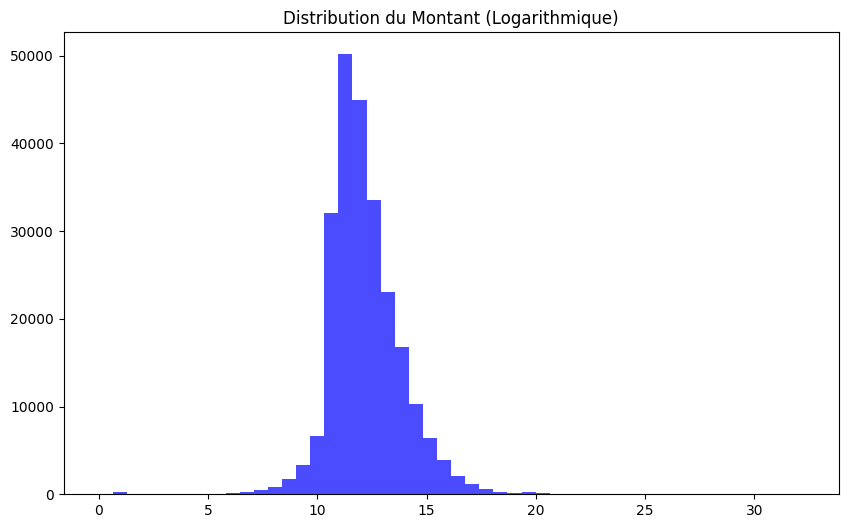

In [12]:
#visualisation de la distribution du montant
plt.figure(figsize=(10, 6))
plt.hist(train['montant'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution du Montant (Logarithmique)')